## Tokenizer

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer

In [25]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")
print(tokenizer.pad_token)

None


In [24]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Data preprocessing is essential for machine learning.",
    "Python is a versatile programming language."
]

ids_len = []

for sentence in sentences:
    encoded = tokenizer(sentence)
    print(f"Token IDs: {encoded['input_ids']}")
    print(f"Attention Mask: {encoded['attention_mask']}")
    decoded = tokenizer.decode(encoded['input_ids'])
    print(f"Decoded Sentence: {decoded}\n")
    ids_len.append(len(encoded['input_ids']))
    
print(f"Lengths of Token ID sequences: {ids_len}")

Token IDs: [128000, 791, 4062, 14198, 39935, 35308, 927, 279, 16053, 5679, 13]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Decoded Sentence: <|begin_of_text|>The quick brown fox jumps over the lazy dog.

Token IDs: [128000, 1061, 64731, 374, 7718, 369, 5780, 6975, 13]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Decoded Sentence: <|begin_of_text|>Data preprocessing is essential for machine learning.

Token IDs: [128000, 31380, 374, 264, 33045, 15840, 4221, 13]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1]
Decoded Sentence: <|begin_of_text|>Python is a versatile programming language.

Lengths of Token ID sequences: [11, 9, 8]


- cách tokenize:
    - tokenize tự động add special token \<bos\> vào đầu mỗi token ids

- vấn đề 1: list của ids có độ dài khác nhau vì vậy không thể gộp lại để đưa vào shape chung (batch, seq_len) - input shape cơ bản để đưa vào transformer
- giải pháp 1: thêm pad_token để patch độ dài bằng nhau
- vấn đề 2: vốn dĩ llama3.2 là mô hình được thiết kế để xử lý input với độ dài khác nhau và nhận biết điểm kết thúc bằng \<EOS\> trong giai đoạn inference NHƯNG ta đang cần SFT
- giải pháp 2: sử dụng \<EOS\> làm pad_token, khi đó attention_mask sẽ cho ta biết đâu là pad thật
- vấn đề 3: câu dài sẽ dẫn đến tokens sẽ nhiều hơn max_length đặt ra
- giải pháp 3: đặt truncation - cắt câu quá dài


In [26]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")
tokenizer.pad_token = tokenizer.eos_token
print(tokenizer.pad_token)
# add patch
ids_len = []

for sentence in sentences:
    encoded = tokenizer(sentence, padding='max_length', max_length=20)
    print(f"Token IDs: {encoded['input_ids']}")
    print(f"Attention Mask: {encoded['attention_mask']}")
    decoded = tokenizer.decode(encoded['input_ids'])
    print(f"Decoded Sentence: {decoded}\n")
    ids_len.append(len(encoded['input_ids']))
    
print(f"Lengths of Token ID sequences: {ids_len}")

<|end_of_text|>
Token IDs: [128000, 791, 4062, 14198, 39935, 35308, 927, 279, 16053, 5679, 13, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decoded Sentence: <|begin_of_text|>The quick brown fox jumps over the lazy dog.<|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|>

Token IDs: [128000, 1061, 64731, 374, 7718, 369, 5780, 6975, 13, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decoded Sentence: <|begin_of_text|>Data preprocessing is essential for machine learning.<|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|>

Token IDs: [128000, 31380, 374, 264, 33045, 15840, 4221

In [ ]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Data preprocessing is essential for machine learning, hello hallo, i love you, meme, haha.",
    "Python is a versatile programming language."
]

sentences_len = [len(sentence) for sentence in sentences]
print(f"Lengths of original sentences: {sentences_len}")

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")
tokenizer.pad_token = tokenizer.eos_token
# add patch
ids_len = []

for sentence in sentences:
    # bạn có thể xoá trunctation để xem sự khác biệt
    encoded = tokenizer(sentence, padding='max_length',truncation=True, max_length=15)
    print(f"Token IDs: {encoded['input_ids']}")
    print(f"Attention Mask: {encoded['attention_mask']}")
    # sử dụng skip_special_tokens để bỏ qua các token đặc biệt khi decode
    decoded = tokenizer.decode(encoded['input_ids'], skip_special_tokens=True)
    print(f"Decoded Sentence: {decoded}\n")
    ids_len.append(len(encoded['input_ids']))
    
print(f"Lengths of Token ID sequences: {ids_len}")

Lengths of original sentences: [44, 90, 43]
<|end_of_text|>
Token IDs: [128000, 791, 4062, 14198, 39935, 35308, 927, 279, 16053, 5679, 13, 128001, 128001, 128001, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
Decoded Sentence: The quick brown fox jumps over the lazy dog.

Token IDs: [128000, 1061, 64731, 374, 7718, 369, 5780, 6975, 11, 24748, 15104, 385, 11, 602, 3021]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Decoded Sentence: Data preprocessing is essential for machine learning, hello hallo, i love

Token IDs: [128000, 31380, 374, 264, 33045, 15840, 4221, 13, 128001, 128001, 128001, 128001, 128001, 128001, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Decoded Sentence: Python is a versatile programming language.

Lengths of Token ID sequences: [15, 15, 15]


- Vấn đề 4: inputs thì có rồi, nhưng ground_truth đâu ?
    - Giải pháp 4: tạo ground truth bằng cách copy từ inputs
    - Giải thích: bản chất của Casual LM là dự đoán token tiếp theo nên là ground truth cũng chính là input

In [40]:
# sử dụng bài tập với dataset thực tế
from datasets import Dataset
subset_ds = Dataset.load_from_disk("../../data/subset_openmathinstruct_1/256K")
subset_ds[0]

{'question': 'Aunt Gemma has four dogs. She feeds them with dog food twice a day. Each dog can consume 250 grams of food per meal. If aunt Gemma bought 2 sacks of dog food, each weighing 50 kilograms, how many days will those food last?',
 'generated_solution': 'Let\'s solve this problem using Python\'s sympy library.\n<llm-code>\nimport sympy as sp\n\n# let\'s denote the number of days in which the food lasts\n# since the "number of days" cannot be a symbol we use q instead\nq = sp.symbols(\'q\')\n\n# total number of grams of food per day\n# a dog consumes 250 grams each day (per meal x 2)\n# there are 4 dogs\nfood_per_day = 250 * 4\n# there are q days\nfood_total = food_per_day * q\n\n# the food is 50 kilograms each in 2 sacks\n# 1 kilogram is 1000 grams\n# 50 kilograms is 50000 grams\ntotal_kg = 50000 * 2\n# expressed in grams\ntotal_g = 50000 * 2 * 1000\n\n# total grams of food per day is what the dogs ate\neq = sp.Eq(food_total, total_g)\n\n# solving for q the number of days\nsp.s

In [ ]:
# gộp question và answer nhằm tạo input cho mô hình
sentences = []
for i in range(3):
    item = subset_ds[i]
    sentence = f"### Question:\n{item['question']}\n\n### Solution:\n{item['generated_solution']}"
    sentences.append(sentence)
sentences

['### Question:\nAunt Gemma has four dogs. She feeds them with dog food twice a day. Each dog can consume 250 grams of food per meal. If aunt Gemma bought 2 sacks of dog food, each weighing 50 kilograms, how many days will those food last?\n\n### Solution:\nLet\'s solve this problem using Python\'s sympy library.\n<llm-code>\nimport sympy as sp\n\n# let\'s denote the number of days in which the food lasts\n# since the "number of days" cannot be a symbol we use q instead\nq = sp.symbols(\'q\')\n\n# total number of grams of food per day\n# a dog consumes 250 grams each day (per meal x 2)\n# there are 4 dogs\nfood_per_day = 250 * 4\n# there are q days\nfood_total = food_per_day * q\n\n# the food is 50 kilograms each in 2 sacks\n# 1 kilogram is 1000 grams\n# 50 kilograms is 50000 grams\ntotal_kg = 50000 * 2\n# expressed in grams\ntotal_g = 50000 * 2 * 1000\n\n# total grams of food per day is what the dogs ate\neq = sp.Eq(food_total, total_g)\n\n# solving for q the number of days\nsp.solve(

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")
tokenizer.pad_token = tokenizer.eos_token

for sentence in sentences:
    # max_length thực tế cao hơn (512, 1024,...) nhưng để demo nên đặt thấp
    encoded = tokenizer(sentence, padding='max_length',truncation=True, max_length=10) 
    
    token_ids = encoded['input_ids']
    attention_mask = encoded['attention_mask']
    labels = token_ids.copy()  # ground truth giống input
    
    print(f"Token IDs: {token_ids}")
    print(f"Attention Mask: {attention_mask}")
    print(f"Labels: {labels}\n")

Token IDs: [128000, 14711, 16225, 512, 32, 3935, 32245, 1764, 706, 3116]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [128000, 14711, 16225, 512, 32, 3935, 32245, 1764, 706, 3116]

Token IDs: [128000, 14711, 16225, 512, 791, 538, 6787, 311, 1935, 264]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [128000, 14711, 16225, 512, 791, 538, 6787, 311, 1935, 264]

Token IDs: [128000, 14711, 16225, 512, 9219, 66826, 706, 400, 1399, 311]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [128000, 14711, 16225, 512, 9219, 66826, 706, 400, 1399, 311]



- vấn đề 5 - vấn đề trong bối cảnh bài toán: việc trích xuất labels như nào ảnh hưởng đến bài toán mà ta hướng tới. Đối với bài toán cần hiểu ngôn ngữ tổng quát nhằm hỗ trợ 1 số use case như tổng hợp, viết lại,... (llama 3.2) thì ta có thể đặt labels như trên. Tuy nhiên ta cần SFT mô hình để có thể suy luận câu trả lời, nên việc labeled luôn câu hỏi là không cần thiết, nó sẽ khiến mô hình sẽ học cách dự đoán câu hỏi
- giải pháp 5: chỉ cần label phần answer

In [52]:
example_ds = [
    {
        "question": "What is 2 + 2?",
        "generated_solution": "2 + 2 equals 4."
    },
    {
        "question": "What is 3 + 1?",
        "generated_solution": "3 + 1 equals 4."
    }
]

In [68]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")
tokenizer.pad_token = tokenizer.eos_token

max_length = 20
eos_id = tokenizer.eos_token_id
for example in example_ds:
    question = example['question']
    answer = example['generated_solution']
    
    question = f"### Question:\n{question}\n\n### Solution:\n"
    answer = f"{answer}"
    
    # bỏ padding và truncation để token_ids không có <EOS> và <BOS> thừa
    question_encoded = tokenizer(question, padding=False, truncation=False)
    answer_encoded = tokenizer(answer, padding=False, truncation=False)
    
    input_ids = question_encoded['input_ids'] + answer_encoded['input_ids'][1:] + [eos_id] # bỏ <BOS> của answer, thêm <EOS> cuối cùng
    
    mask_len = len(question_encoded['input_ids'])
    labels = [-100] * mask_len + answer_encoded['input_ids'][1:] + [eos_id]  # chỉ học phần answer
    
    if len(input_ids) > max_length:
        input_ids = input_ids[:max_length]
        labels = labels[:max_length]
        
        input_ids[-1] = eos_id
        labels[-1] = eos_id
    
    attention_mask = [1] * len(input_ids)
    padding_len = max_length - len(input_ids)
    
    if padding_len > 0:
        input_ids = input_ids + [tokenizer.pad_token_id] * padding_len
        attention_mask = attention_mask + [0] * padding_len
        labels = labels + [-100] * padding_len
    
    print(f"Input IDs: {input_ids}")
    print(f"Attention Mask: {attention_mask}")
    print(f"Labels: {labels}\n")

Input IDs: [128000, 14711, 16225, 512, 3923, 374, 220, 17, 489, 220, 17, 1980, 14711, 12761, 512, 17, 489, 220, 17, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 17, 489, 220, 17, 128001]

Input IDs: [128000, 14711, 16225, 512, 3923, 374, 220, 18, 489, 220, 16, 1980, 14711, 12761, 512, 18, 489, 220, 16, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 18, 489, 220, 16, 128001]



giải thích về cải tiến ở đoạn code trên:
- vì ta chỉ cần label phần answer nên cần tách quy trình token ra, chỉ label duy nhất phần trả lời, để hàm loss tối ưu phần giải toán. Ví dụ: question: ###Question: 1 + 1 = ?\n\n###Answer:\n, answer: 2 -> labels chỉ giữ id của 2 và EOS còn lại là -100 hết

## Thống kê về độ dài token 

In [70]:
from tqdm import tqdm

max_length = 1024
real_max_length = 0
length_inputids_stats = []
eos_id = tokenizer.eos_token_id


for example in tqdm(subset_ds):
    question = example['question']
    answer = example['generated_solution']
    
    question = f"### Question:\n{question}\n\n### Solution:\n"
    answer = f"{answer}"
    
    # bỏ padding và truncation để token_ids không có <EOS> và <BOS> thừa
    question_encoded = tokenizer(question, padding=False, truncation=False)
    answer_encoded = tokenizer(answer, padding=False, truncation=False)
    
    input_ids = question_encoded['input_ids'] + answer_encoded['input_ids'][1:] + [eos_id] # bỏ <BOS> của answer, thêm <EOS> cuối cùng
    
    length_inputids_stats.append(len(input_ids))
    if real_max_length < len(input_ids):
        real_max_length = len(input_ids)

100%|██████████| 512000/512000 [08:02<00:00, 1061.58it/s]


--- BÁO CÁO PHÂN PHỐI ĐỘ DÀI ---
Tổng số mẫu: 512000
Độ dài thực tế lớn nhất (Real Max): 3259
Trung bình (Mean): 239.83
Trung vị (Median): 208.00
P95 (Bao phủ 95% dữ liệu): 473
P99 (Bao phủ 99% dữ liệu): 740

Với Max Length = 1024:
- Số mẫu bị cắt: 1232
- Tỷ lệ mất mát: 0.24%


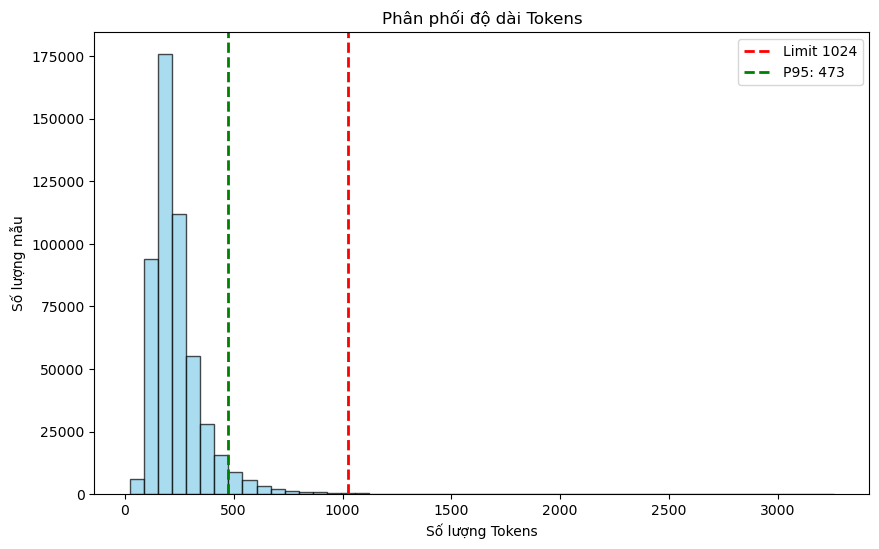

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Chuyển sang numpy array để tính toán nhanh
stats = np.array(length_inputids_stats)

print(f"--- BÁO CÁO PHÂN PHỐI ĐỘ DÀI ---")
print(f"Tổng số mẫu: {len(stats)}")
print(f"Độ dài thực tế lớn nhất (Real Max): {real_max_length}") # Hoặc np.max(stats)
print(f"Trung bình (Mean): {np.mean(stats):.2f}")
print(f"Trung vị (Median): {np.median(stats):.2f}")

# Các mốc quan trọng (Percentiles)
p95 = np.percentile(stats, 95)
p99 = np.percentile(stats, 99)
print(f"P95 (Bao phủ 95% dữ liệu): {p95:.0f}")
print(f"P99 (Bao phủ 99% dữ liệu): {p99:.0f}")

# Tính tỷ lệ bị cắt nếu chọn max_length = 1024
truncated_count = np.sum(stats > 1024)
truncated_percent = (truncated_count / len(stats)) * 100
print(f"\nVới Max Length = 1024:")
print(f"- Số mẫu bị cắt: {truncated_count}")
print(f"- Tỷ lệ mất mát: {truncated_percent:.2f}%")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.hist(stats, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=1024, color='red', linestyle='dashed', linewidth=2, label='Limit 1024')
plt.axvline(x=p95, color='green', linestyle='dashed', linewidth=2, label=f'P95: {p95:.0f}')
plt.title('Phân phối độ dài Tokens')
plt.xlabel('Số lượng Tokens')
plt.ylabel('Số lượng mẫu')
plt.legend()
plt.show()

Insights:
- Về độ bao phủ (Data Coverage & Integrity):

    - Ngưỡng max_length = 1024 là một lựa chọn an toàn tuyệt đối về mặt thống kê.

    - Mức này bao phủ >99% không gian mẫu của bài toán, đảm bảo tính toàn vẹn dữ liệu và triệt tiêu rủi ro mất mát thông tin quan trọng do cắt gọt (truncation risk) ở phần đuôi của phân phối.

- Về hiệu suất tính toán (Computational Efficiency & Sparsity):

    - Tuy nhiên, phân phối chiều dài token thể hiện tính chất lệch trái rõ rệt. Các chỉ số thống kê P95 = 473 và P99 = 740 cho thấy khoảng cách rất lớn giữa phần lớn độ dài thực tế và ngưỡng tối đa.

    - Vấn đề cốt lõi: Nếu áp dụng kỹ thuật Static Padding (đệm cố định) lên 1024 cho toàn bộ dataset, trung bình hơn 50% tài nguyên bộ nhớ (VRAM) và phép tính ma trận (Compute FLOPs) trong mỗi bước training sẽ bị lãng phí để xử lý các Padding Tokens (giá trị 0) vô nghĩa.

- Kết luận: Việc này tạo ra một điểm nghẽn (bottleneck) về hiệu năng

- Giải pháp Data Collator: Dynamic Padding
    - Thay vì padding tất cả mọi mẫu dữ liệu lên 1024 ngay từ lúc tiền xử lý (static padding), chúng ta sẽ giữ nguyên độ dài thực của chuỗi input. Chỉ khi gom dữ liệu vào một Batch (ví dụ 8 mẫu), chúng ta mới padding cả 8 mẫu đó bằng độ dài của mẫu dài nhất trong batch đó.

    - Ví dụ:

        - Batch có 3 mẫu với độ dài: [200, 300, 600].

        - Collator sẽ padding cả 3 mẫu lên 600 (thay vì 1024).
        
        - Kết quả: Tiết kiệm được hơn 50% tính toán cho batch này.

- Vấn đề: giả sử batch với [100, 150, 1000], thì toàn bộ sẽ bị kéo lên 1000. Vẫn lãng phí

- Giải pháp: sử dụng group_by_len trong training loop

In [ ]:
# pipeline hoàn chỉnh
from transformers import AutoTokenizer, DataCollatorForSeq2Seq
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")
tokenizer.pad_token = tokenizer.eos_token

max_length = 1024
eos_id = tokenizer.eos_token_id
processed_examples = []

for example in example_ds:
    question = example['question']
    answer = example['generated_solution']
    
    question = f"### Question:\n{question}\n\n### Solution:\n"
    answer = f"{answer}"
    
    question_encoded = tokenizer(question, padding=False, truncation=False, add_special_tokens=True)
    answer_encoded = tokenizer(answer, padding=False, truncation=False, add_special_tokens=True)
    
    input_ids = question_encoded['input_ids'] + answer_encoded['input_ids'][1:] + [eos_id]
    
    mask_len = len(question_encoded['input_ids'])
    labels = [-100] * mask_len + answer_encoded['input_ids'][1:] + [eos_id]
    
    if len(input_ids) > max_length:
        input_ids = input_ids[:max_length]
        labels = labels[:max_length]
        
        input_ids[-1] = eos_id
        labels[-1] = eos_id
    
    attention_mask = [1] * len(input_ids)
    
    processed_examples.append(
        {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }
    )
    
    print(f"Input IDs: {input_ids}")
    print(f"Attention Mask: {attention_mask}")
    print(f"Labels: {labels}\n")

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, padding='max_length', max_length=max_length, return_tensors='pt')
batch = data_collator(processed_examples)
print(f"Batch Input IDs shape: {batch['input_ids'].shape}")

Input IDs: [128000, 14711, 16225, 512, 3923, 374, 220, 17, 489, 220, 17, 1980, 14711, 12761, 512, 17, 489, 220, 17, 17239, 220, 19, 13, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 17, 489, 220, 17, 17239, 220, 19, 13, 128001]

Input IDs: [128000, 14711, 16225, 512, 3923, 374, 220, 18, 489, 220, 16, 1980, 14711, 12761, 512, 18, 489, 220, 16, 17239, 220, 19, 13, 128001]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels: [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 18, 489, 220, 16, 17239, 220, 19, 13, 128001]

Batch Input IDs shape: torch.Size([2, 1024])
